# Wave data analysis
From the raw data feed, get the following:
 - [f] get frequency data as collection (1/seconds) measure of cycles per second
 - [E] get wave energy data as E (meters squared per second)

Perform the following calculations:
  1. [df] Average of frequency pairs comparing each frequency with the one after it
  2. [Emid] calculate the Energy mid-point
  3. [fmid] calculate the frequency mid-point
  4. [SWF] Significant wave height integrating across the entire range of frequencies (as a function of wave periods)
  5. [p] define the arbitrary period second intervals (p = [0,5,7,9,11,13,15,17,19,21,35])
  6. [pmid] calculate the mid-point (between frequencies) Making plots nicer.
  7. [pf] shift the focus from frequencies to periods
  8. [SWHmid] # integrate the calculations: 4* sqrt(sum(df*Emid))

*PLOT the results*

In [1]:
%matplotlib inline

# the address to the buoy data (should pass in as argument)
# 46053 = E. Santa Barbara
# 46054 = W. Santa Barbara
# 46217 = Anacapa Passage
# 46086 = San Clemente Basin
# 46219 = San Nicolas Island
filename = '46053' # the buoy name
url = 'https://www.ndbc.noaa.gov/data/realtime2/{}.data_spec'.format(filename)
dest = './data/{}.data_spec'.format(filename)
from urllib.request import urlretrieve
urlretrieve(url, dest)


('./data/46053.data_spec', <http.client.HTTPMessage at 0x7f4d5e13fac8>)

### Read the file into 3 lists
Skipping the first 3 header lines

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#filename = '46053' # the buoy name
dest = './data/{}.data_spec'.format(filename)

dates = []
energies = []
frequencies = []

with open(dest) as fp:
    for _ in range(3):
        next(fp)
    
    for l in fp:

        dates.append(l.split()[0:5])
        # separation_frequency = l.split()[5] # this value is ignored
        
        # [E] get wave energy data as E (meters squared per second)
        energies.append([float(e) for e in l.split()[6::2]])

        # [f] get frequency data as collection (1/seconds) measure of cycles per second
        freqs=l.split()[7::2]
        frequencies.append([float(i[1:-1]) for i in freqs])

    fp.close()
print("{}\t{}\t{}".format(len(dates), len(energies), len(frequencies)))

1075	1075	1075


### convert the lists to numpy arrays

In [3]:
E = np.array(energies)    # E for 'Energy'
f = np.array(frequencies) # f for 'frequency'

Take a peek at the Energy data:

E (Energy) is a numpy array (1075, 46)


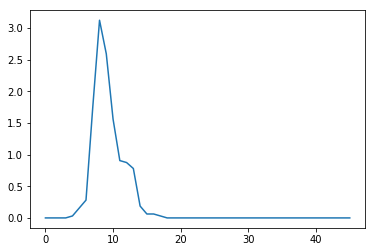

In [4]:
print("E (Energy) is a numpy array {}".format(E.shape))
sample_ndx = 500
plt.plot(E[sample_ndx,:]) # view the data

In [5]:
f[sample_ndx,:]   # display the data

array([0.033, 0.038, 0.043, 0.048, 0.053, 0.058, 0.063, 0.068, 0.073,
       0.078, 0.083, 0.088, 0.093, 0.1  , 0.11 , 0.12 , 0.13 , 0.14 ,
       0.15 , 0.16 , 0.17 , 0.18 , 0.19 , 0.2  , 0.21 , 0.22 , 0.23 ,
       0.24 , 0.25 , 0.26 , 0.27 , 0.28 , 0.29 , 0.3  , 0.31 , 0.32 ,
       0.33 , 0.34 , 0.35 , 0.365, 0.385, 0.405, 0.425, 0.445, 0.465,
       0.485])

Take a peek at the frequency data:

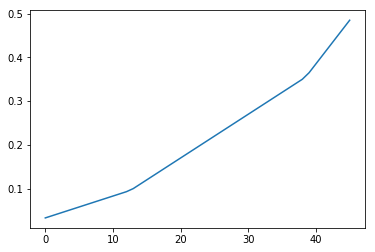

In [6]:
plt.plot(f[sample_ndx,:])

### 1. [df] Average of frequency pairs comparing each frequency with the one after it

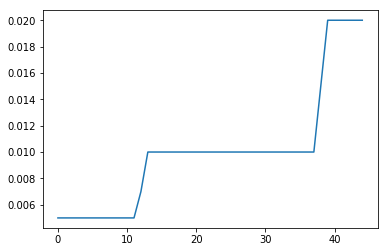

In [7]:
df = np.diff(f)
plt.plot(df[sample_ndx,:])# slice of one row

### 2. [Emid] calculate the Energy mid-point

In [8]:
notfirst = E[:,1:]       # every element in a row, except for the first
notlast  = E[:,:-1]      # every element in a row, except for the last
Emid = .5 * (notlast + notfirst) 
print(Emid.shape)
Emid[sample_ndx]

(1075, 45)


array([0.    , 0.    , 0.    , 0.0155, 0.0935, 0.2185, 1.014 , 2.4335,
       2.855 , 2.075 , 1.2325, 0.8895, 0.827 , 0.4835, 0.1245, 0.062 ,
       0.0465, 0.0155, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    ])

### 3. [fmid] calculate the frequency mid-point

In [9]:
fmid = .5*(f[:,:-1] + f[:,1:]) 
print(fmid.shape)
fmid[sample_ndx]

(1075, 45)


array([0.0355, 0.0405, 0.0455, 0.0505, 0.0555, 0.0605, 0.0655, 0.0705,
       0.0755, 0.0805, 0.0855, 0.0905, 0.0965, 0.105 , 0.115 , 0.125 ,
       0.135 , 0.145 , 0.155 , 0.165 , 0.175 , 0.185 , 0.195 , 0.205 ,
       0.215 , 0.225 , 0.235 , 0.245 , 0.255 , 0.265 , 0.275 , 0.285 ,
       0.295 , 0.305 , 0.315 , 0.325 , 0.335 , 0.345 , 0.3575, 0.375 ,
       0.395 , 0.415 , 0.435 , 0.455 , 0.475 ])

### 4. [SWH]  significant wave height (m -> multiply by 3.28 to get in feet)
integrating across the entire range of frequencies
(the integral)

SWH = 4\*sqrt(sum(df.*Emid,2)); 

.* takes two arrays and returns a 3rd array (of same size) The '2' restricts this to the 2nd dimension

Significant wave height:
 <class 'numpy.ndarray'> (1075,) [1.9769087  1.79887965 1.57225952 ... 0.99710381 1.0575292  0.83825056]


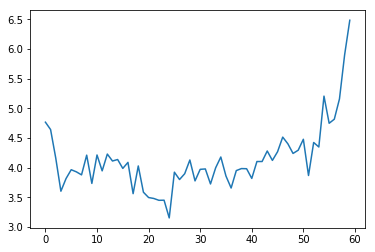

In [10]:
product = (df*Emid)
SWH = 4*np.sqrt(product.sum(axis=1)); 

#plt.plot(SWH[:60]*3.28)
print("Significant wave height:\n",type(SWH), SWH.shape, SWH)

SWHflipped = SWH[::-1]
plt.plot(SWHflipped[-60:]*3.28)

### 5. [p] define period second intervals

In [11]:
p = np.array([0,5,7,9,11,13,15,17,19,21,35])
p

array([ 0,  5,  7,  9, 11, 13, 15, 17, 19, 21, 35])

### 6. [pmid] calculate the mid-point (between frequencies) 

In [12]:
notfirst = p[1:]       # every element in a row, except for the first
notlast  = p[:-1]      # every element in a row, except for the last
pmid = .5*(notfirst + notlast)
pmid

array([ 2.5,  6. ,  8. , 10. , 12. , 14. , 16. , 18. , 20. , 28. ])

---

### 7. [pf] shift the focus from frequencies to periods

In [13]:
pf = 1./fmid
print("pf:\n",pf)

pf:
 [[28.16901408 24.69135802 21.97802198 ...  2.29885057  2.1978022
   2.10526316]
 [28.16901408 24.69135802 21.97802198 ...  2.29885057  2.1978022
   2.10526316]
 [28.16901408 24.69135802 21.97802198 ...  2.29885057  2.1978022
   2.10526316]
 ...
 [28.16901408 24.69135802 21.97802198 ...  2.29885057  2.1978022
   2.10526316]
 [28.16901408 24.69135802 21.97802198 ...  2.29885057  2.1978022
   2.10526316]
 [28.16901408 24.69135802 21.97802198 ...  2.29885057  2.1978022
   2.10526316]]


### 8.[SWHmid] integrate the calculations: 4 sqrt(sum(dfEmid))